Инвесторы

Ричард и Эрлих идут на переговоры с k инвесторами. У них два метода ведения переговоров, либо вести себя по-хамски, тем самым не дать прогнуть себя, либо вести себя прилично. У них только n дней, для того, чтобы представить свой проект, всем инвесторам. 

Они понимают, что если вести себя по-хамски, то инвесторы не будут посылать их на повторные переговоры, но успех при этом будет сомнителен. Если же они будут себя вести прилично, то инвесторы будут наглеть и устраивать больше встреч. 

Они изначально составляют план, сколько времени они готовы тратить на каждого инвестора. Если они готовы рискнуть, то они будут вести себя максимально неприлично, на этого инвестора планируют немного дней. Если же инвестор стоит того, и они готовы тратить время, чтобы представлять проект снова и снова, то они будут терпеливы, и планируют больше дней. Так как у них ограничено время, то они могут просто не пойти на встречу. 

Ричард для каждого инвестора составил функцию зависимости вероятности успеха ведения переговоров от количества дней, потраченных на инвестора. Функции неубывающие.  Смотрите таблицу. Таблица составлена для 5 дней, и 4 инвесторов. 

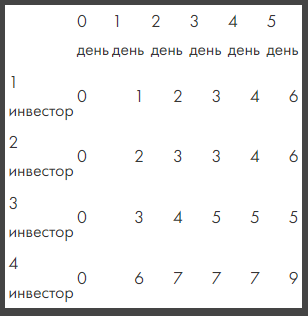

Ричард считает успешной стратегию, при которой сумма вероятностей успехов максимальна. 

Для данных из таблицы выше успешная стратегия следующая: 

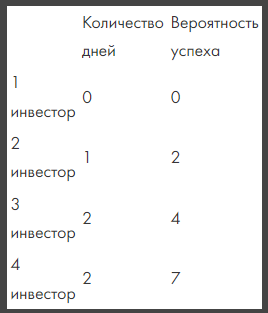

При этом максимальная суммарная вероятность равна 13. 

Ваша задача найти максимальную суммарную вероятность, для входных данных. 

Задача подразумевает решение методом динамического программирования. 

Входные данные: k, n, функции успеха 

Пример входных данных: 

4

5

1,2,3,4,6

2,3,3,4,6

3,4,5,5,5

6,7,7,7,9

k ≤ 20, n ≤ 20

Выходные данные: максимальная суммарная вероятность

In [ ]:
import sys
text = []
for line in sys.stdin:
    line = line.strip()
    line = list(line.split(','))
    text.append(line)

x = int(text[0][0])
y = int(text[1][0])
text = text[2:]


new_text = []
for row in text:
    row = [int(i) for i in row]
    new_text.append(row)

text = new_text
elem = []
    
for i in range(x):
    for j in range(y+1):
        elem.append([i,j,text[i][j]])

prefixes = set(range(x))
groups = [[a for a in elem if a[0]==p] for p in prefixes]

output = 0
best_comb = 0

def product(*args, repeat=1):
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[z] for x in result for z in pool if sum(list(i[1] for i in x+[z])) <= y]
    for prod in result:
        yield tuple(prod)

for item in product(*groups):
    if sum(list(i[2] for i in item)) > output:
        output = sum(list(i[2] for i in item))
        best_comb = item
        
print(output)